**Notebook to accompany AI in Real Estate lecture**


**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import math

**Read the data**

In [2]:
df=pd.read_csv("cal_housing.data.csv")

* Quick examination of the data

In [3]:
df.loc[20635]

Longitude           -121.0900
Latitude              39.4800
Median Age            25.0000
Total Rooms         1665.0000
Total Bedrooms       374.0000
Population           845.0000
Households           330.0000
Median Income          1.5603
MedianHomeValue    78100.0000
Name: 20635, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Longitude        20640 non-null  float64
 1   Latitude         20640 non-null  float64
 2   Median Age       20640 non-null  int64  
 3   Total Rooms      20640 non-null  int64  
 4   Total Bedrooms   20640 non-null  int64  
 5   Population       20640 non-null  int64  
 6   Households       20640 non-null  int64  
 7   Median Income    20640 non-null  float64
 8   MedianHomeValue  20640 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


**Feature Engineering**
* Convert Total Rooms to rooms_per_home
* Convert Total Bedrooms to bedrooms_per_home
* Convert Population to people_per_home

In [5]:
df['rooms_per_home'] = df["Total Rooms"]/df["Households"]
df['bedrooms_per_home'] = df["Total Bedrooms"]/df["Households"]
df['people_per_home'] = df["Population"]/df["Households"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          20640 non-null  float64
 1   Latitude           20640 non-null  float64
 2   Median Age         20640 non-null  int64  
 3   Total Rooms        20640 non-null  int64  
 4   Total Bedrooms     20640 non-null  int64  
 5   Population         20640 non-null  int64  
 6   Households         20640 non-null  int64  
 7   Median Income      20640 non-null  float64
 8   MedianHomeValue    20640 non-null  int64  
 9   rooms_per_home     20640 non-null  float64
 10  bedrooms_per_home  20640 non-null  float64
 11  people_per_home    20640 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1.9 MB


**Add a "density" column **
* Draw the map
* Write a function boxgen that returns the nxn boxes on the map
* Create a column that contains the box number a block is in
* Create a column that counts the number of homes in a box

In [7]:
import folium
from folium import plugins
from folium.plugins import HeatMap


m=folium.Map(location = [37,-119],zoom_start=8)

heat_data = list(zip(df.Latitude,df.Longitude))
HeatMap(heat_data,radius=15).add_to(m)




# Display the map
m.save("cal.html")
m

In [8]:
print(df.Longitude.min())
print(df.Latitude.min())
print(df.Longitude.max())
print(df.Latitude.max())


-124.35
32.54
-114.31
41.95


In [9]:
def boxgen(s,n,e,w,no):
    boxes = list()
    la_range = n-s
    lo_range = e-w
    no_div = no-1
    for i in range(0,no):
        for j in range(0,no):
            se = (s+i*la_range/no,e-j*lo_range/no)
            sw = (s+i*la_range/no,e-(j+1)*lo_range/no)
            nw = (s+(i+1)*la_range/no,e-(j+1)*lo_range/no)
            ne = (s+(i+1)*la_range/no,e-j*lo_range/no)
            boxes.append((se,sw,nw,ne))
            
        
    return boxes

In [10]:
#a is a list of all boxes (we're using 400)
a = boxgen(df.Latitude.min(),df.Latitude.max(),df.Longitude.max(),df.Longitude.min(),20)
print(len(a))

400


**The is_in function returns the box number for a given block**

In [11]:
def is_in(lat,lon,a):
    for i in range(len(a)):
        (se,sw,nw,ne) = a[i]
        if lat > se[0] and lat < ne[0] and lon < se[1] and lon > nw[1]:
            return i
    return 0

is_in(37.88,-122.23,a)

235

**Get the box number for a block**

In [12]:
df["zone"] = df.apply(lambda x: is_in(x.Latitude,x.Longitude,a),axis=1)

In [13]:
df[["zone","Latitude","Longitude"]]

,zone,Latitude,Longitude
0,235,37.88,-122.23
1,235,37.86,-122.22
2,235,37.85,-122.24
3,235,37.85,-122.25
4,235,37.85,-122.25
...,...,...,...
20635,293,39.48,-121.09
20636,293,39.49,-121.21
20637,293,39.43,-121.22
20638,293,39.43,-121.32


**Number of blocks in each zone**
* density counts the blocks in a zone and adds it as data for each block

In [14]:
sizes = df.groupby("zone").size()
df["density"] = df.apply(lambda x: sizes.loc[x.zone],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          20640 non-null  float64
 1   Latitude           20640 non-null  float64
 2   Median Age         20640 non-null  int64  
 3   Total Rooms        20640 non-null  int64  
 4   Total Bedrooms     20640 non-null  int64  
 5   Population         20640 non-null  int64  
 6   Households         20640 non-null  int64  
 7   Median Income      20640 non-null  float64
 8   MedianHomeValue    20640 non-null  int64  
 9   rooms_per_home     20640 non-null  float64
 10  bedrooms_per_home  20640 non-null  float64
 11  people_per_home    20640 non-null  float64
 12  zone               20640 non-null  int64  
 13  density            20640 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.2 MB


**Get rid of unnecessary columns**

In [16]:
df = df[["Median Age","rooms_per_home",'bedrooms_per_home','people_per_home',
           'Median Income','density','MedianHomeValue']]

**Look at distributions**
* First, the means

**Plot distribution of Median Age and density**

In [17]:
import seaborn as sns


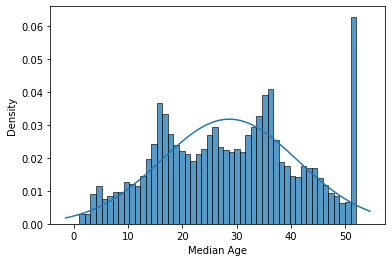

In [18]:
from scipy import stats
x=df["Median Age"]
ax=sns.histplot(x=x,bins=50,stat='density')
mu, std = stats.norm.fit(x)
xx = np.linspace(*ax.get_xlim(),100)
ax.plot(xx, stats.norm.pdf(xx, mu, std));

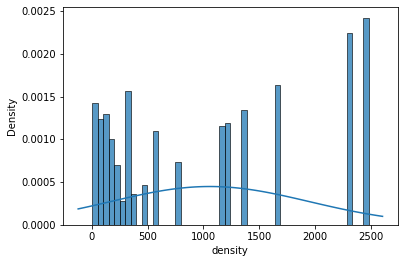

In [19]:
from scipy import stats
x=df["density"]
ax=sns.histplot(x=x,bins=50,stat='density')
mu, std = stats.norm.fit(x)
xx = np.linspace(*ax.get_xlim(),100)
ax.plot(xx, stats.norm.pdf(xx, mu, std));

**Convert columns to 0..1 range**

In [20]:
save_col = df["MedianHomeValue"].copy()
df = (df-df.min())/(df.max()-df.min())
df.MedianHomeValue = save_col
df

,Median Age,rooms_per_home,bedrooms_per_home,people_per_home,Median Income,density,MedianHomeValue
0,0.784314,0.043512,0.020469,0.001499,0.539668,0.474809,452600
1,0.392157,0.038224,0.018929,0.001141,0.538027,0.474809,358500
2,1.000000,0.052756,0.021940,0.001698,0.466028,0.474809,352100
3,1.000000,0.035241,0.021929,0.001493,0.354699,0.474809,341300
4,1.000000,0.038534,0.022166,0.001198,0.230776,0.474809,342200
...,...,...,...,...,...,...,...
20635,0.470588,0.029769,0.023715,0.001503,0.073130,0.027811,78100
20636,0.333333,0.037344,0.029124,0.001956,0.141853,0.027811,77100
20637,0.313725,0.030904,0.023323,0.001314,0.082764,0.027811,92300
20638,0.333333,0.031783,0.024859,0.001152,0.094295,0.027811,84700


**Create a value_category column for classification**
* We'll use value_category as the dv for classification
* And MedianHomeValue as the dv for regression

In [21]:
df["value_category"] = (df.MedianHomeValue>=206856).astype('int')

In [22]:
df.loc[20635]

Median Age               0.470588
rooms_per_home           0.029769
bedrooms_per_home        0.023715
people_per_home          0.001503
Median Income            0.073130
density                  0.027811
MedianHomeValue      78100.000000
value_category           0.000000
Name: 20635, dtype: float64

In [23]:
df_classification = df.drop(columns="MedianHomeValue")
df_regression = df.drop(columns="value_category")

In [24]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Median Age         20640 non-null  float64
 1   rooms_per_home     20640 non-null  float64
 2   bedrooms_per_home  20640 non-null  float64
 3   people_per_home    20640 non-null  float64
 4   Median Income      20640 non-null  float64
 5   density            20640 non-null  float64
 6   value_category     20640 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


In [25]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Median Age         20640 non-null  float64
 1   rooms_per_home     20640 non-null  float64
 2   bedrooms_per_home  20640 non-null  float64
 3   people_per_home    20640 non-null  float64
 4   Median Income      20640 non-null  float64
 5   density            20640 non-null  float64
 6   MedianHomeValue    20640 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


**Classification**

In [26]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_classification, test_size = 0.3,random_state=3456)
X_train = train[['Median Age', 'rooms_per_home', 'bedrooms_per_home', 'people_per_home',
       'Median Income', 'density',]]
y_train = train.value_category
X_test = test[['Median Age', 'rooms_per_home', 'bedrooms_per_home', 'people_per_home',
       'Median Income', 'density',]]
y_test = test.value_category

In [27]:
X_train = train[['Median Age', 'rooms_per_home', 'bedrooms_per_home', 'people_per_home',
       'Median Income', 'density',]]
y_train = train.value_category

In [28]:
X_test = test[['Median Age', 'rooms_per_home', 'bedrooms_per_home', 'people_per_home',
       'Median Income', 'density',]]
y_test = test.value_category

**Classifier Linear model**

In [29]:
from sklearn.linear_model import SGDClassifier

#Create a model object. Parameters of the model object are known as hyper parameters
clf = SGDClassifier(random_state=42,max_iter=200,loss="log_loss") 

#Fit the data to the model. This estimates the model parameters 
#Model parameters and hyper parameters are different (more on this later)
clf.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
y_test_pred = clf.predict(X_test)
cfm = confusion_matrix(y_test,y_test_pred)

accuracy = (cfm[0,0]+cfm[1,1])/len(X_test)
precision = (cfm[1,1]/(cfm[0,1]+cfm[1,1]))
print(accuracy,precision)

0.7845607235142119 0.8097035040431266


**Coefficients**

In [30]:
print(clf.intercept_,clf.coef_)

[-5.12870857] [[ 1.82542119 -2.44456084  0.68515993 -1.59673167 14.25029685  0.59547565]]


**Classifier Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier

#Create a model object. Parameters of the model object are known as hyper parameters
clf = DecisionTreeClassifier(max_depth=5) 

#Fit the data to the model. This estimates the model parameters 
#Model parameters and hyper parameters are different (more on this later)
clf.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
y_test_pred = clf.predict(X_test)
cfm = confusion_matrix(y_test,y_test_pred)

accuracy = (cfm[0,0]+cfm[1,1])/len(X_test)
precision = (cfm[1,1]/(cfm[0,1]+cfm[1,1]))
print(accuracy,precision)

0.8199289405684754 0.8143382352941176


**Tree**

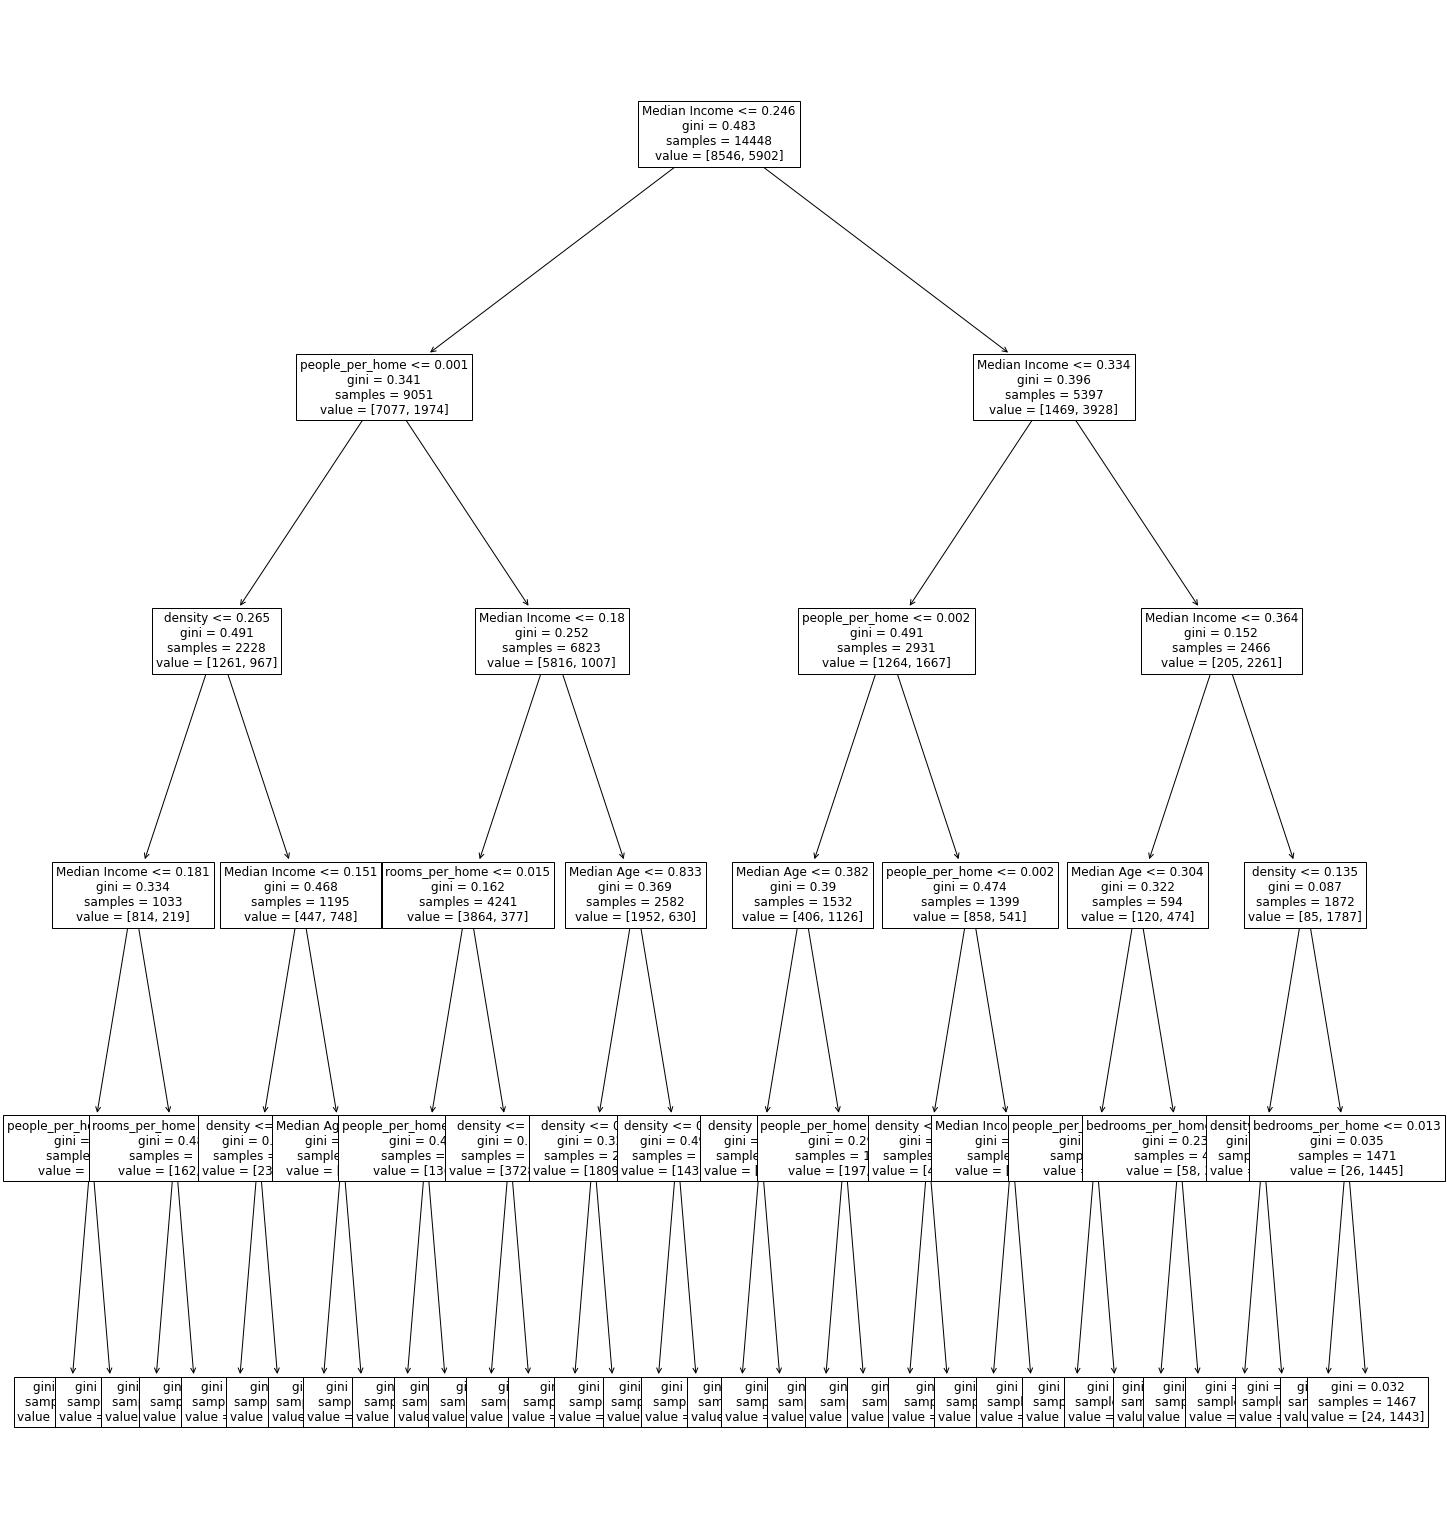

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

#associate column names with features
feature_names = X_train.columns

#set up a figure (mainly for the size)
fig, ax = plt.subplots(figsize=(24, 28))

#plot the tree
tree.plot_tree(clf,feature_names=feature_names, max_depth=5, fontsize=12)

plt.show()


**Classifier Random Forest**


In [33]:
from sklearn.ensemble import RandomForestClassifier

#Create a model object. Parameters of the model object are known as hyper parameters
clf = RandomForestClassifier(n_estimators=60,max_samples=0.8,
                                max_features=0.6) 

#Fit the data to the model. This estimates the model parameters 
#Model parameters and hyper parameters are different (more on this later)
clf.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
y_test_pred = clf.predict(X_test)
cfm = confusion_matrix(y_test,y_test_pred)

accuracy = (cfm[0,0]+cfm[1,1])/len(X_test)
precision = (cfm[1,1]/(cfm[0,1]+cfm[1,1]))
print(accuracy,precision)

0.8575581395348837 0.8384778012684989


**Relative importance**

Text(0.5, 0, 'Relative Importance')

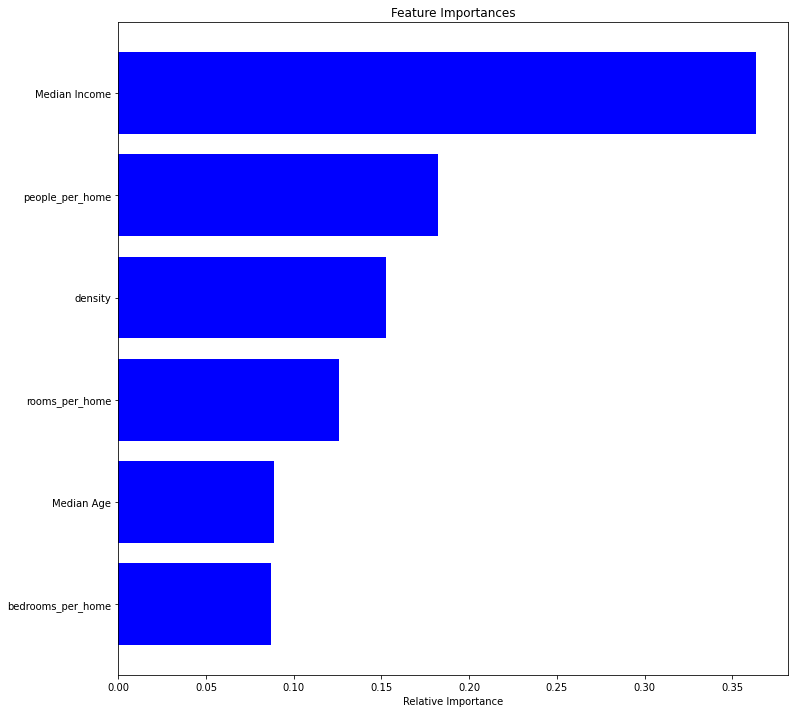

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],  color='b', align='center')
plt.yticks(range(len(indices)),labels[indices])

plt.xlabel('Relative Importance')


**Regression Models**

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_regression, test_size = 0.3,random_state=3456)
X_train = train[['Median Age', 'rooms_per_home', 'bedrooms_per_home', 'people_per_home',
       'Median Income', 'density',]]
y_train = train.MedianHomeValue
X_test = test[['Median Age', 'rooms_per_home', 'bedrooms_per_home', 'people_per_home',
       'Median Income', 'density',]]
y_test = test.MedianHomeValue

**Regression Linear Model**


In [36]:
from sklearn.linear_model import LinearRegression
rgr = LinearRegression()
rgr.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
import math
y_true = y_test
y_prediction = rgr.predict(X_test)
print("r-square",rgr.score(X_test,y_test))
print("rmse",math.sqrt(mean_squared_error(y_true, y_prediction)))

r-square 0.5507947148606402
rmse 77423.22284115253


**Equation coeffs**

In [37]:
print(rgr.intercept_,rgr.coef_)

2334.687793667137 [   69980.07733655 -2396897.59907813  2770149.65756821  -614761.84927868
   733457.16445822    29425.34551015]


**Regression Decision Tree**

In [38]:
from sklearn.tree import DecisionTreeRegressor
rgr = DecisionTreeRegressor(max_depth=5)
rgr.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
import math
y_true = y_test
y_prediction = rgr.predict(X_test)
print("r-square",rgr.score(X_test,y_test))
print("rmse",math.sqrt(mean_squared_error(y_true, y_prediction)))

r-square 0.6252584778864253
rmse 70715.51767596968


**The tree**

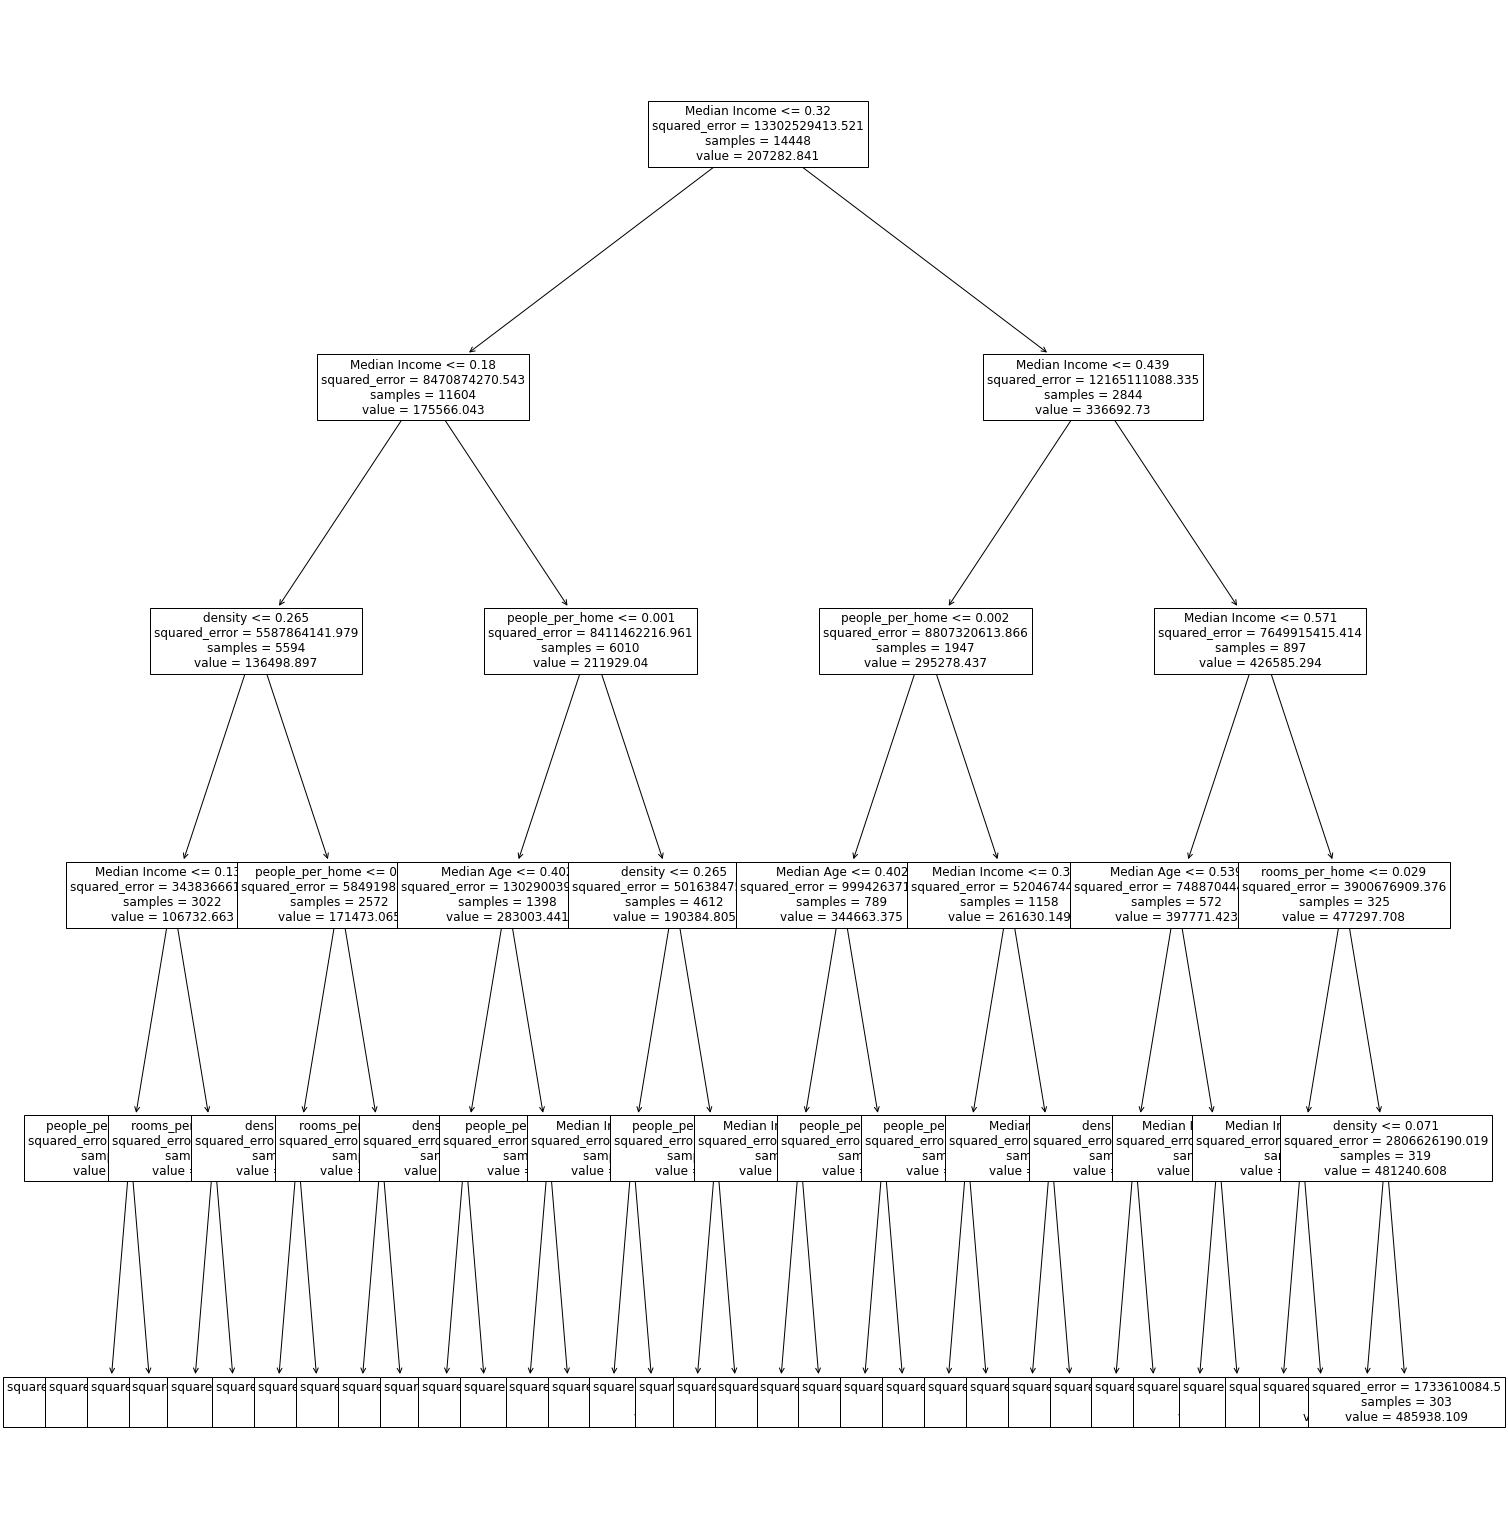

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree

#associate column names with features
feature_names = X_train.columns

#set up a figure (mainly for the size)
fig, ax = plt.subplots(figsize=(24, 28))

#plot the tree
tree.plot_tree(rgr,feature_names=feature_names, max_depth=5, fontsize=12)

plt.show()

**Regression Random Forest**

In [40]:
from sklearn.ensemble import RandomForestRegressor
rgr = RandomForestRegressor(max_features=3,max_samples=0.8,n_estimators=60)
rgr.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
import math
y_true = y_test
y_prediction = rgr.predict(X_test)
print("r-square",rgr.score(X_test,y_test))
print("rmse",math.sqrt(mean_squared_error(y_true, y_prediction)))

r-square 0.7470867150665446
rmse 58094.44913258112


**Relative importance**

Text(0.5, 0, 'Relative Importance')

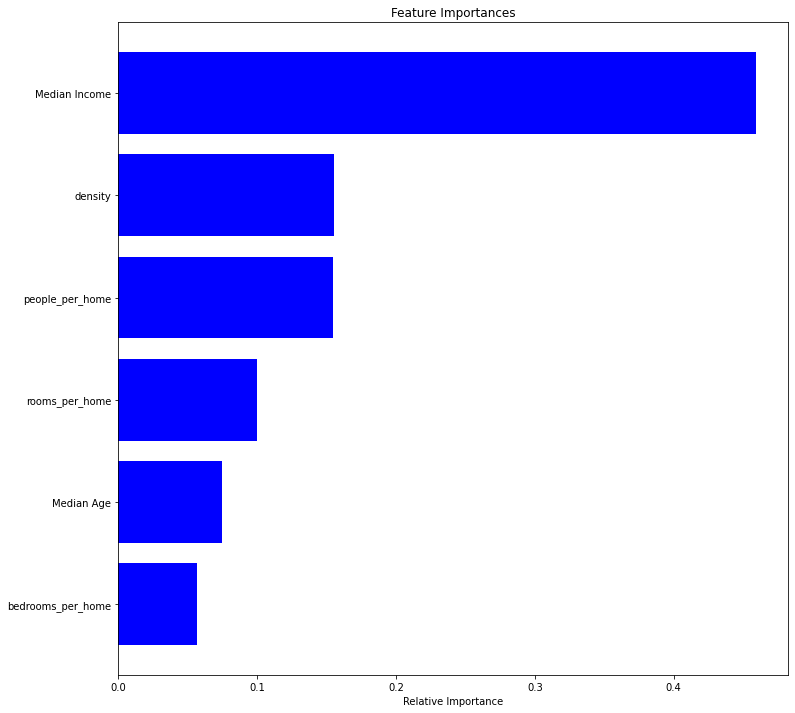

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = X_train.columns
importances = rgr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],  color='b', align='center')
plt.yticks(range(len(indices)),labels[indices])

plt.xlabel('Relative Importance')
